In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [115]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [116]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [117]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552040 entries, 0 to 1552039
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1552040 non-null  int64  
 1   kWh       1552040 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.7 MB


In [118]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1552035    0.13
1552036    0.12
1552037    0.12
1552038    0.12
1552039    0.12
Name: kWh, Length: 1552040, dtype: float64

In [119]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1552035    0.13
1552036    0.12
1552037    0.12
1552038    0.12
1552039    0.12
Name: kWh, Length: 1552040, dtype: float64

In [120]:
l=len(conso_data)-1
l

1552039

In [121]:
conso_data['sec']=conso_data['Interval']/1000


In [122]:
conso_data['Wh']=3600000/conso_data['Interval']


In [123]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [124]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552040 entries, 0 to 1552039
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1552040 non-null  int64  
 1   kWh        1552040 non-null  float64
 2   sec        1552040 non-null  float64
 3   Wh         1552040 non-null  float64
 4   cumul(ms)  1552040 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 59.2 MB


In [125]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1552035,28535,0.13,28.535,126.160855,38419716423
1552036,28624,0.12,28.624,125.768586,38419745047
1552037,28671,0.12,28.671,125.562415,38419773718
1552038,28720,0.12,28.720,125.348189,38419802438
1552039,28666,0.12,28.666,125.584316,38419831104


In [126]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38419831104000

In [127]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 48, 49, 740659)

In [128]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [129]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [130]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [131]:
conso_data['dates']

0         2023-08-21 18:49:11.674659
1         2023-08-21 18:49:33.532659
2         2023-08-21 18:49:55.533659
3         2023-08-21 18:50:17.461659
4         2023-08-21 18:50:39.352659
                     ...            
1552035   2024-11-08 10:57:26.163659
1552036   2024-11-08 10:57:54.787659
1552037   2024-11-08 10:58:23.458659
1552038   2024-11-08 10:58:52.178659
1552039   2024-11-08 10:59:20.844659
Name: dates, Length: 1552040, dtype: datetime64[ns]

## créer les dates

In [132]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:49:11.674659,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:49:33.532659,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:49:55.533659,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:50:17.461659,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:50:39.352659,21/08/23
...,...,...,...,...,...,...,...
1552035,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24
1552036,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24
1552037,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24
1552038,28720,0.12,28.720,125.348189,38419802438,2024-11-08 10:58:52.178659,08/11/24


### save conso_data with dates

In [133]:
#to_csv('conso_data_with_dates.csv',conso_data)

# tranche journalière


In [134]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('08/11/24', 8, 11, 2024)

In [135]:
here = now.strftime('%H:%M:%S')
here

'10:59:46'

In [136]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [137]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 1549867 to 1552039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2173 non-null   int64         
 1   kWh        2173 non-null   float64       
 2   sec        2173 non-null   float64       
 3   Wh         2173 non-null   float64       
 4   cumul(ms)  2173 non-null   int64         
 5   dates      2173 non-null   datetime64[ns]
 6   days       2173 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 135.8+ KB


In [138]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [139]:
data = list(df_grp['kWh'])
print(data)

[0.867, 3.7, 4.23, 3.687, 4.199, 4.627, 3.498, 3.399, 3.53, 3.684, 3.816, 3.742, 4.257, 3.839, 3.438, 3.632, 3.325, 3.445, 4.24, 4.003, 4.056, 3.911, 3.434, 4.478, 3.711, 3.771, 4.436, 4.664, 3.751, 3.223, 3.172, 4.036, 3.644, 3.178, 3.793, 4.174, 3.74, 3.56, 4.801, 4.174, 4.543, 3.773, 3.39, 4.313, 3.881, 3.874, 3.433, 4.075, 3.652, 3.406, 4.115, 3.397, 3.887, 3.832, 3.646, 3.749, 4.244, 3.289, 3.875, 2.968, 2.057, 2.042, 2.467, 4.089, 3.737, 4.323, 3.633, 3.901, 3.747, 3.947, 3.951, 4.13, 3.631, 3.17, 3.795, 3.549, 3.592, 3.703, 3.686, 3.236, 3.907, 3.263, 3.748, 3.591, 4.093, 3.607, 3.337, 3.825, 4.064, 4.384, 4.082, 3.999, 4.22, 3.749, 3.929, 3.874, 3.911, 3.749, 4.039, 4.338, 3.884, 3.525, 3.664, 3.673, 3.338, 3.853, 3.988, 4.111, 3.473, 4.177, 3.604, 4.115, 4.505, 3.688, 3.417, 3.585, 4.186, 3.664, 4.078, 3.982, 3.75, 3.585, 5.137, 3.701, 3.76, 4.303, 4.087, 4.766, 4.394, 3.953, 3.796, 4.367, 4.65, 4.226, 4.779, 4.344, 3.677, 4.226, 3.685, 3.622, 3.525, 3.963, 3.647, 3.789, 3.59,

In [140]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [141]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [142]:
df = conso_data
len(df)

1552040

In [143]:
period(p=2)

2023-08-22 00:55:25.477659	2023-08-22 07:59:41.097659	7h 4m 15s 	2000


In [144]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.292578
dtype: float64

In [145]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.47991
dtype: float64

In [146]:
last=df_grp.iloc[-1]['kWh']
last

2.173

In [147]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 1549867 to 1552039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2173 non-null   int64         
 1   kWh        2173 non-null   float64       
 2   sec        2173 non-null   float64       
 3   Wh         2173 non-null   float64       
 4   cumul(ms)  2173 non-null   int64         
 5   dates      2173 non-null   datetime64[ns]
 6   days       2173 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 135.8+ KB


In [148]:
# select day
day = today
#day = '16/08/24'


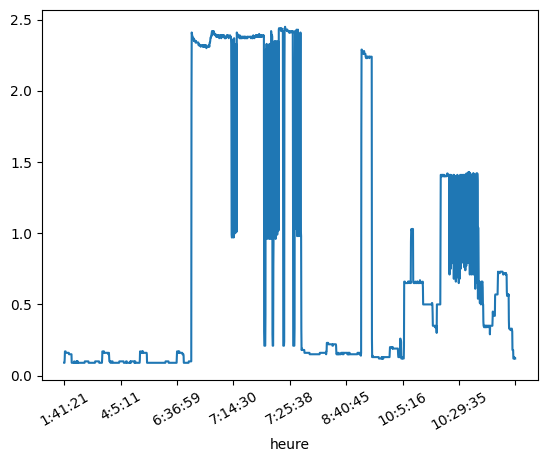

In [149]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [150]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:49:11.674659,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:49:33.532659,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:49:55.533659,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:50:17.461659,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:50:39.352659,21/08/23
...,...,...,...,...,...,...,...
1552035,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24
1552036,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24
1552037,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24
1552038,28720,0.12,28.720,125.348189,38419802438,2024-11-08 10:58:52.178659,08/11/24


In [151]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,39476,0.09,39.476,91.194650,38380273536,2024-11-08 00:00:03.276659,08/11/24
0:0:42,39329,0.09,39.329,91.535508,38380312865,2024-11-08 00:00:42.605659,08/11/24
0:1:18,35855,0.10,35.855,100.404407,38380348720,2024-11-08 00:01:18.460659,08/11/24
0:1:52,34271,0.10,34.271,105.045082,38380382991,2024-11-08 00:01:52.731659,08/11/24
0:2:28,35643,0.10,35.643,101.001599,38380418634,2024-11-08 00:02:28.374659,08/11/24
...,...,...,...,...,...,...,...
10:57:26,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24
10:57:54,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24
10:58:23,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24


In [152]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.084
Min : 11/10/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1549867,39476,0.09,39.476,91.194650,38380273536,2024-11-08 00:00:03.276659,08/11/24,0:0:3
1549868,39329,0.09,39.329,91.535508,38380312865,2024-11-08 00:00:42.605659,08/11/24,0:0:42
1549869,35855,0.10,35.855,100.404407,38380348720,2024-11-08 00:01:18.460659,08/11/24,0:1:18
1549870,34271,0.10,34.271,105.045082,38380382991,2024-11-08 00:01:52.731659,08/11/24,0:1:52
1549871,35643,0.10,35.643,101.001599,38380418634,2024-11-08 00:02:28.374659,08/11/24,0:2:28
...,...,...,...,...,...,...,...,...
1552035,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24,10:57:26
1552036,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24,10:57:54
1552037,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24,10:58:23
1552038,28720,0.12,28.720,125.348189,38419802438,2024-11-08 10:58:52.178659,08/11/24,10:58:52


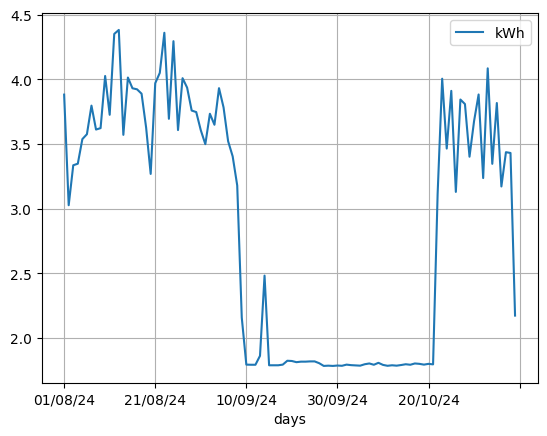

In [153]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-08 00:00:03.276659	2024-11-08 07:16:39.720659	7h 16m 36s 	1000
2024-11-08 07:16:39.720659	2024-11-08 10:33:49.416659	3h 17m 9s 	2000
2024-11-08 10:33:49.416659	2024-11-08 10:59:20.844659	0h 25m 31s 	173
<class 'pandas.core.frame.DataFrame'>
Index: 2173 entries, 1549867 to 1552039
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2173 non-null   int64         
 1   kWh        2173 non-null   float64       
 2   sec        2173 non-null   float64       
 3   Wh         2173 non-null   float64       
 4   cumul(ms)  2173 non-null   int64         
 5   dates      2173 non-null   datetime64[ns]
 6   days       2173 non-null   object        
 7   heure      2173 non-null   object        
 8   hours      2173 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 169.8+ KB


('08/11/24', <Axes: xlabel='hours'>)

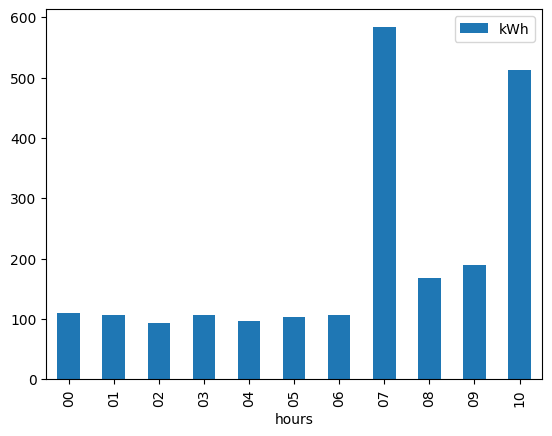

In [154]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [155]:
df_grp

,kWh
days,
21/08/23,0.867
22/08/23,3.700
23/08/23,4.230
24/08/23,3.687
25/08/23,4.199
...,...
04/11/24,3.816
05/11/24,3.171
06/11/24,3.436


In [156]:
# select number of days to display
span = 30
#df_grp.tail(span)


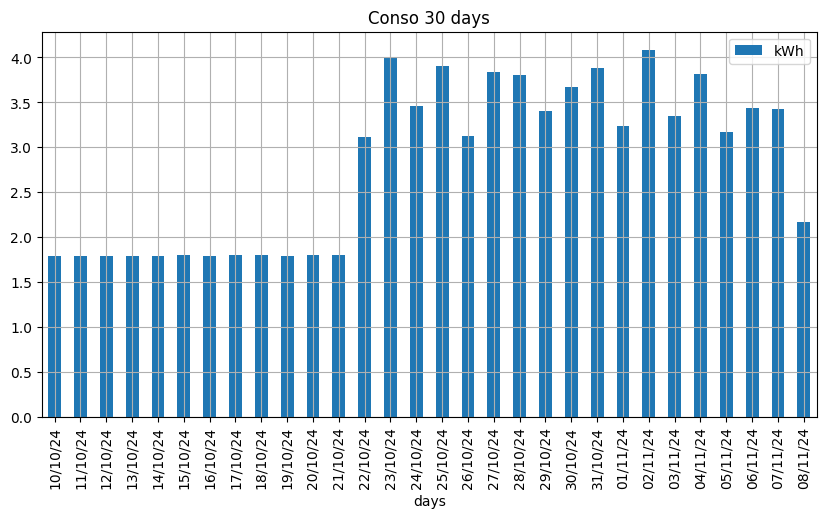

In [157]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


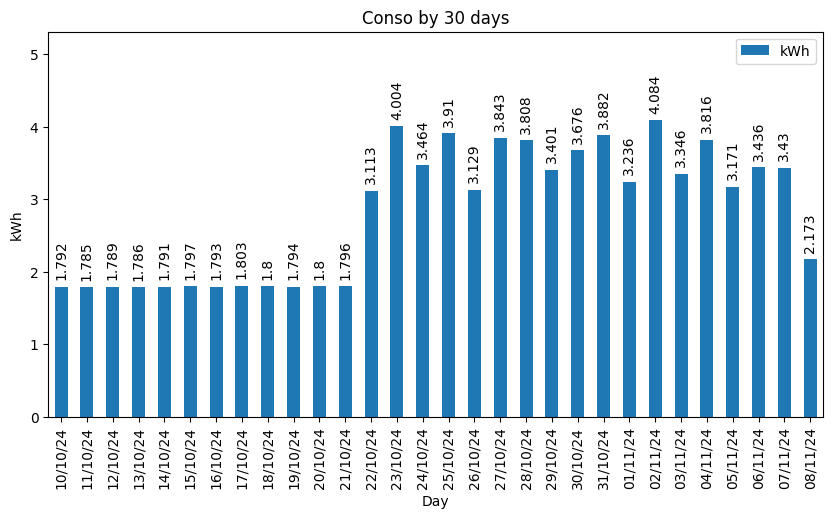

In [158]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [159]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
10/10/24    1.792
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.113
23/10/24    4.004
24/10/24    3.464
25/10/24    3.910
26/10/24    3.129
27/10/24    3.843
28/10/24    3.808
29/10/24    3.401
30/10/24    3.676
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
03/11/24    3.346
04/11/24    3.816
05/11/24    3.171
06/11/24    3.436
07/11/24    3.430
08/11/24    2.173
Name: kWh, dtype: float64

In [160]:
x_labels=df_grp.tail(span).index
x_labels

Index(['10/10/24', '11/10/24', '12/10/24', '13/10/24', '14/10/24', '15/10/24',
       '16/10/24', '17/10/24', '18/10/24', '19/10/24', '20/10/24', '21/10/24',
       '22/10/24', '23/10/24', '24/10/24', '25/10/24', '26/10/24', '27/10/24',
       '28/10/24', '29/10/24', '30/10/24', '31/10/24', '01/11/24', '02/11/24',
       '03/11/24', '04/11/24', '05/11/24', '06/11/24', '07/11/24', '08/11/24'],
      dtype='object', name='days')

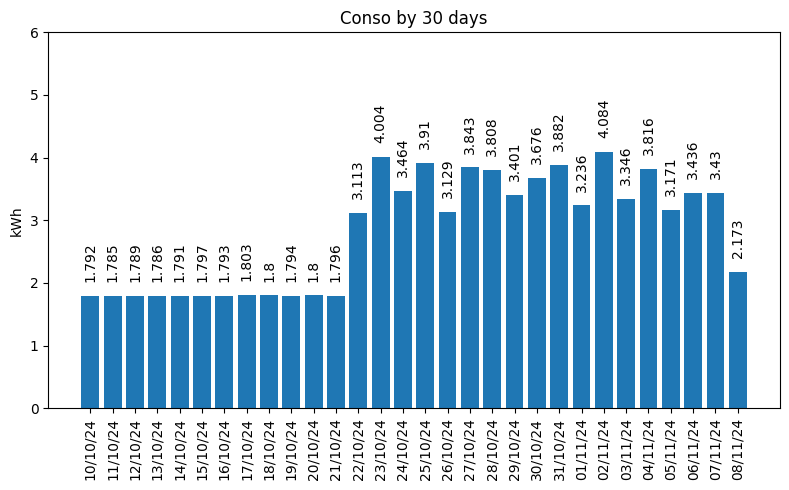

In [161]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [162]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

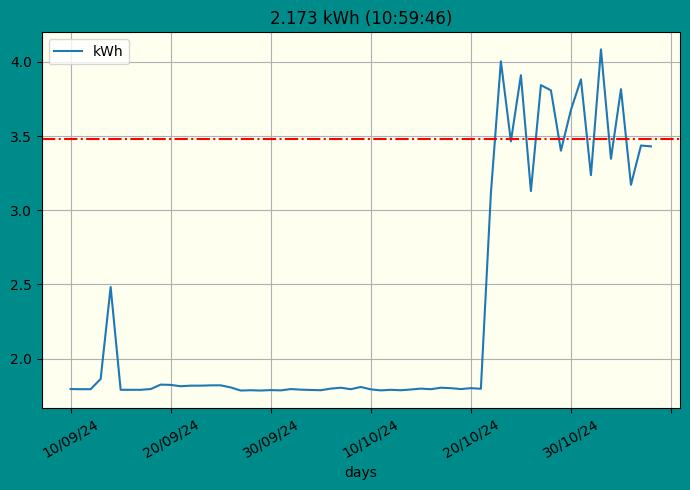

In [163]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

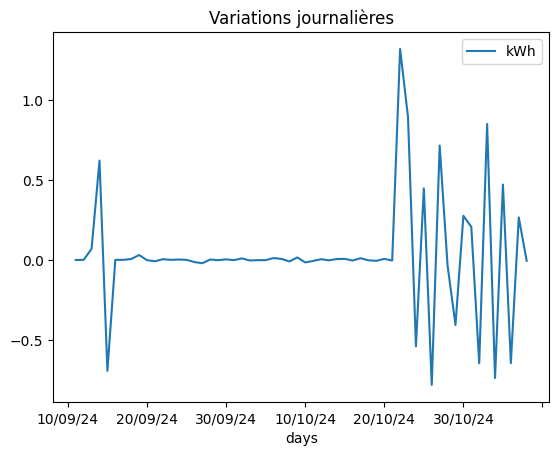

In [164]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [165]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:49:11.674659,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:49:33.532659,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:49:55.533659,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:50:17.461659,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:50:39.352659,21/08/23,18
...,...,...,...,...,...,...,...,...
1552035,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24,10
1552036,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24,10
1552037,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24,10
1552038,28720,0.12,28.720,125.348189,38419802438,2024-11-08 10:58:52.178659,08/11/24,10


In [166]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [167]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [168]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [169]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,867
22/08/23,3700
23/08/23,4230
24/08/23,3687
25/08/23,4199
...,...
04/11/24,3816
05/11/24,3171
06/11/24,3436


In [171]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:49:11.674659,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:49:33.532659,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:49:55.533659,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:50:17.461659,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:50:39.352659,21/08/23,18
...,...,...,...,...,...,...,...,...
1552035,28535,0.13,28.535,126.160855,38419716423,2024-11-08 10:57:26.163659,08/11/24,10
1552036,28624,0.12,28.624,125.768586,38419745047,2024-11-08 10:57:54.787659,08/11/24,10
1552037,28671,0.12,28.671,125.562415,38419773718,2024-11-08 10:58:23.458659,08/11/24,10
1552038,28720,0.12,28.720,125.348189,38419802438,2024-11-08 10:58:52.178659,08/11/24,10


In [172]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
08/11/24 10    1552035  08/11/24    10  0.13
               1552036  08/11/24    10  0.12
               1552037  08/11/24    10  0.12
               1552038  08/11/24    10  0.12
               1552039  08/11/24    10  0.12

[1552040 rows x 3 columns]

In [173]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [174]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [175]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,867,867
22/08/23,3700,3700
23/08/23,4230,4230
24/08/23,3687,3687
25/08/23,4199,4199
...,...,...
04/11/24,3816,3816
05/11/24,3171,3171
06/11/24,3436,3436


In [176]:
grp_by_day['kWh'].cumsum()

days
21/08/23        867
22/08/23       4567
23/08/23       8797
24/08/23      12484
25/08/23      16683
             ...   
04/11/24    1539830
05/11/24    1543001
06/11/24    1546437
07/11/24    1549867
08/11/24    1552040
Name: kWh, Length: 446, dtype: int64

In [177]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      30
         19     265
         20     182
         21     130
         22     130
...             ...
08/11/24 06     106
         07     584
         08     167
         09     189
         10     512

[10673 rows x 1 columns]

In [178]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            30
          19           295
          20           477
          21           607
          22           737
                    ...   
08/11/24  06       1550588
          07       1551172
          08       1551339
          09       1551528
          10       1552040
Name: kWh, Length: 10673, dtype: int64

In [179]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      30      30    NaN
         19     265     295  235.0
         20     182     477  -83.0
         21     130     607  -52.0
         22     130     737    0.0
...             ...     ...    ...
08/11/24 06     106     721    3.0
         07     584    1305  478.0
         08     167    1472 -417.0
         09     189    1661   22.0
         10     512    2173  323.0

[10673 rows x 3 columns]

In [180]:
today, grp_by_dayhours.loc[today]

('08/11/24',
        kWh  cumsum   diff
 hours                    
 00     109     109    NaN
 01     106     215   -3.0
 02      93     308  -13.0
 03     107     415   14.0
 04      97     512  -10.0
 05     103     615    6.0
 06     106     721    3.0
 07     584    1305  478.0
 08     167    1472 -417.0
 09     189    1661   22.0
 10     512    2173  323.0)

Text(0.5, 1.0, 'Cumul journalier')

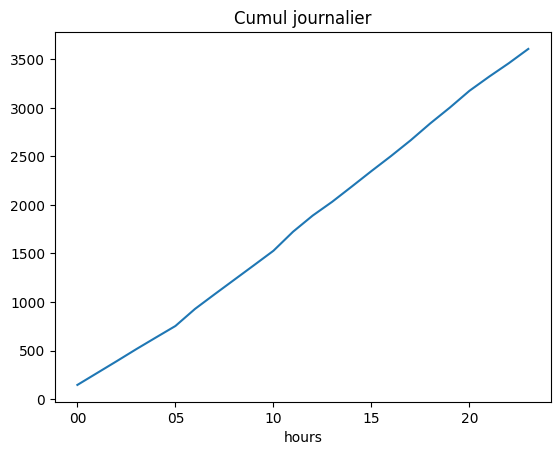

In [181]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

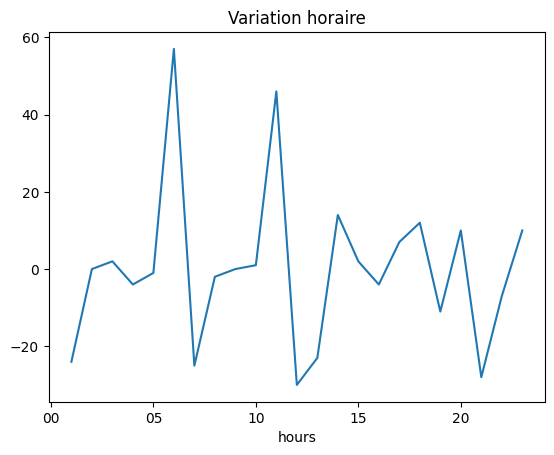

In [182]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [183]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

446

Text(0.5, 1.0, '446 days')

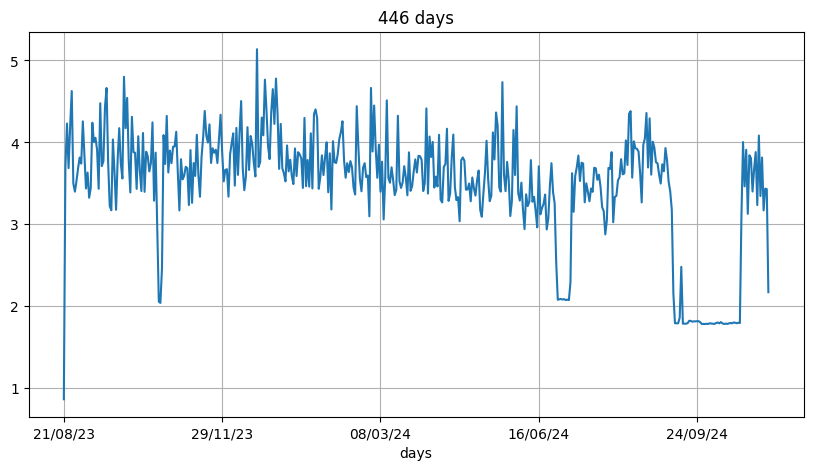

In [184]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

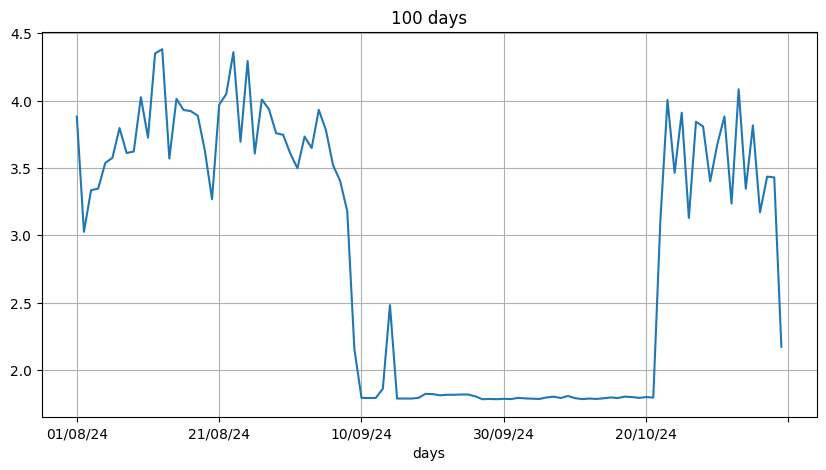

In [185]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [186]:
df_grp.tail(span)['kWh']

days
01/08/24    3.881
02/08/24    3.026
03/08/24    3.335
04/08/24    3.347
05/08/24    3.537
            ...  
04/11/24    3.816
05/11/24    3.171
06/11/24    3.436
07/11/24    3.430
08/11/24    2.173
Name: kWh, Length: 100, dtype: float64

In [187]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,109,109,NaN
01,106,215,-3.0
02,93,308,-13.0
03,107,415,14.0
04,97,512,-10.0
05,103,615,6.0
06,106,721,3.0
07,584,1305,478.0
08,167,1472,-417.0


In [188]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [189]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [190]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [191]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [192]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [193]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [194]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [195]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [196]:
day

'08/11/24'

In [197]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,109,109,NaN,1.0
01,106,215,-3.0,2.0
02,93,308,-13.0,3.0
03,107,415,14.0,4.0
04,97,512,-10.0,5.0
05,103,615,6.0,6.0
06,106,721,3.0,7.0
07,584,1305,478.0,8.0
08,167,1472,-417.0,9.0


Text(0.5, 1.0, '08/11/24')

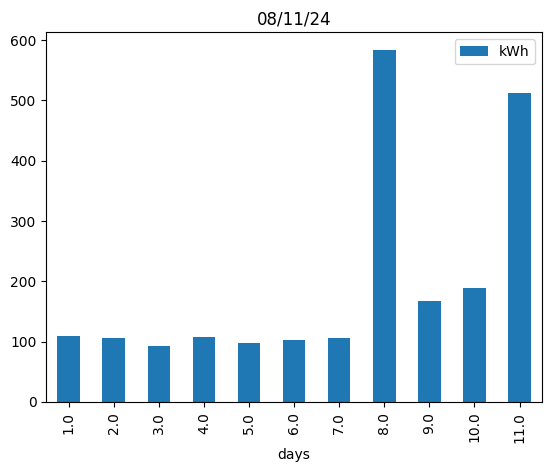

In [198]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [199]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [200]:
groupedbyhour.count()

,kWh
hours,
00,109
01,106
02,93
03,107
04,97
05,103
06,106
07,584
08,167


In [201]:
day = '13/09/24'
#day = today
grp_by_dayhours.loc[day].kWh

hours
00     77
01     77
02     77
03     77
04     76
05     76
06     76
07     75
08     73
09     72
10     74
11     73
12     72
13     73
14     73
15     74
16     73
17     74
18     72
19     77
20     75
21     83
22    106
23    107
Name: kWh, dtype: int64

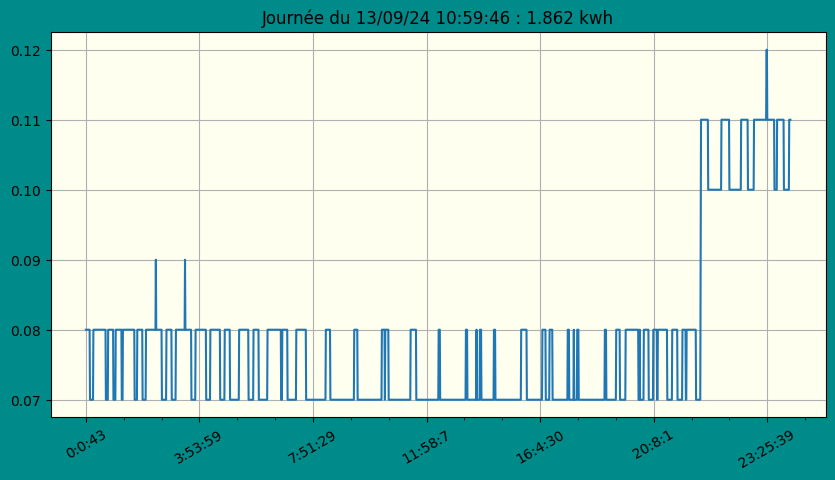

In [202]:
show('13/09/24',bgcolor='ivory')

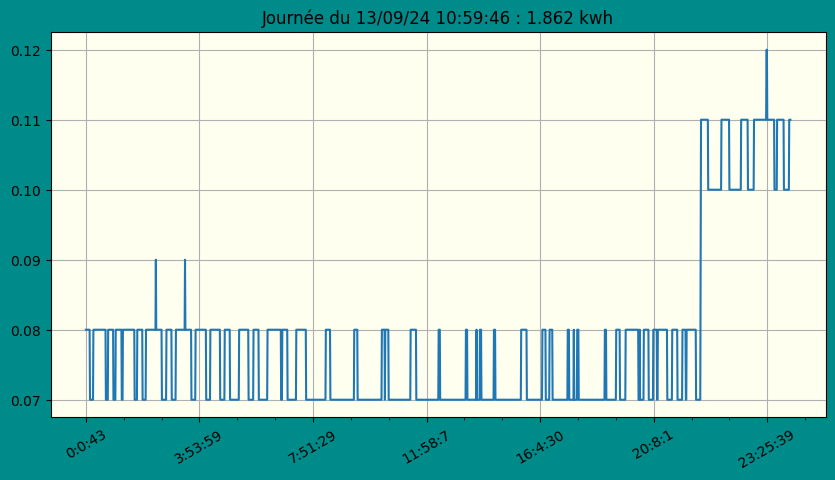

In [203]:
show(day,bgcolor='ivory')

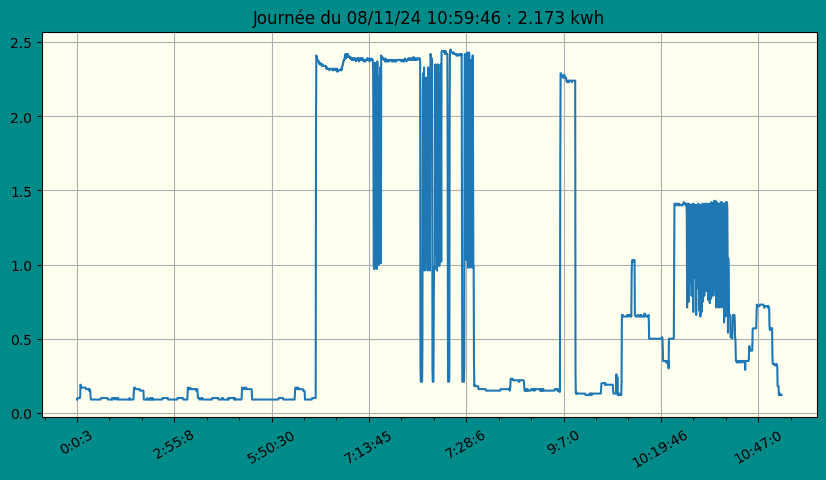

In [204]:
# retour vietnam 22/10/2024
show(today,bgcolor='ivory')

In [205]:
today

'08/11/24'

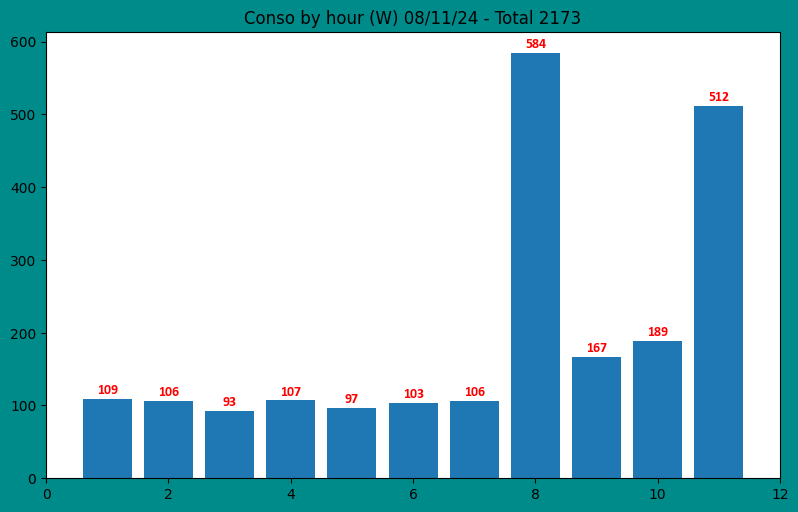

In [206]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_dayhours.loc[today].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today} - Total {sum(data)}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [207]:
sum(data)

2173

In [208]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,109,109,NaN,1.0
01,106,215,-3.0,2.0
02,93,308,-13.0,3.0
03,107,415,14.0,4.0
04,97,512,-10.0,5.0
05,103,615,6.0,6.0
06,106,721,3.0,7.0
07,584,1305,478.0,8.0
08,167,1472,-417.0,9.0


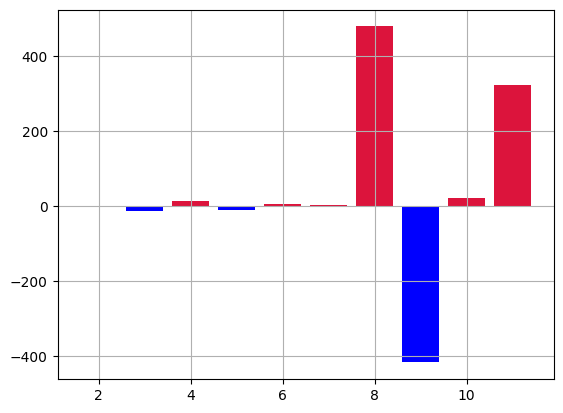

In [209]:
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

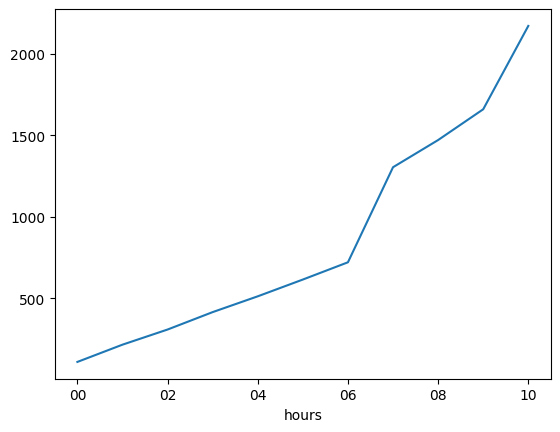

In [210]:
data.cumsum().plot()


<Axes: xlabel='hours'>

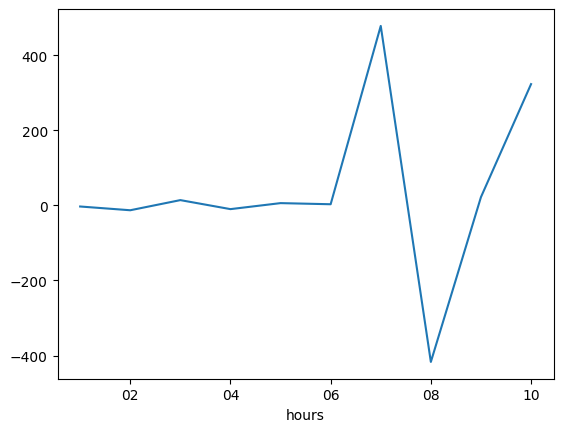

In [211]:
data.diff().plot()

# Test

In [212]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [213]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [214]:
#conso_byhour(day)

In [215]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

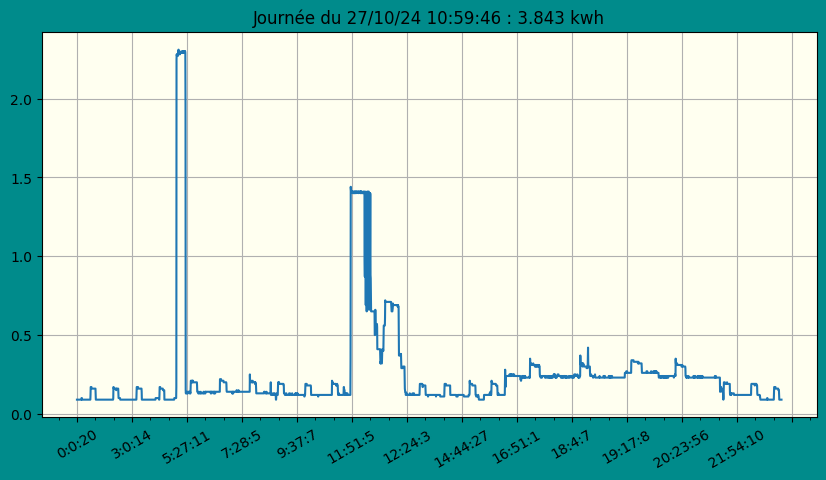

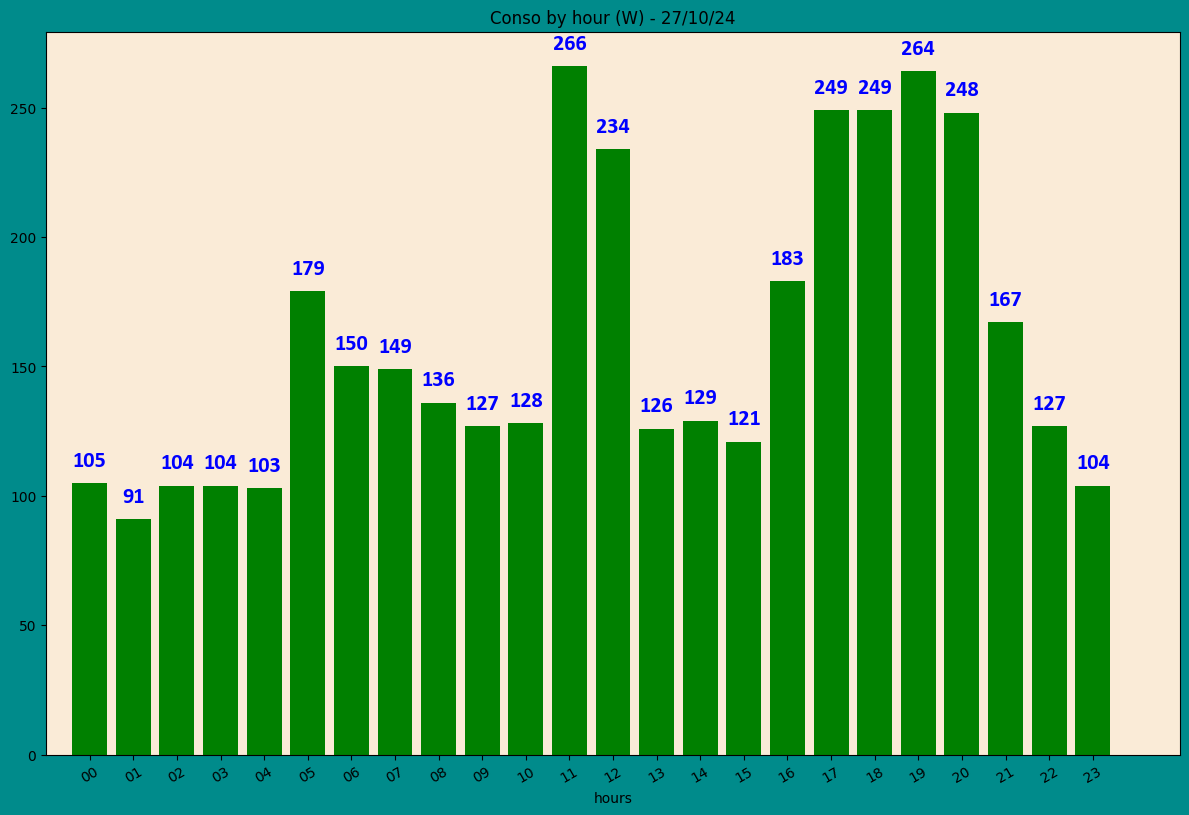

In [216]:
# plot any day
day = '27/10/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

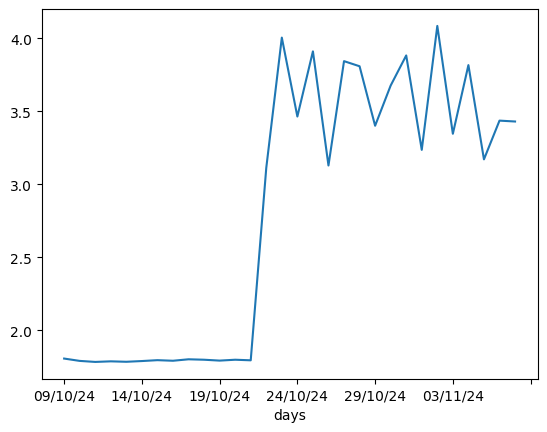

In [217]:
month.plot()


In [218]:
month

days
09/10/24    1.808
10/10/24    1.792
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.113
23/10/24    4.004
24/10/24    3.464
25/10/24    3.910
26/10/24    3.129
27/10/24    3.843
28/10/24    3.808
29/10/24    3.401
30/10/24    3.676
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
03/11/24    3.346
04/11/24    3.816
05/11/24    3.171
06/11/24    3.436
07/11/24    3.430
Name: kWh, dtype: float64

In [219]:
month

days
09/10/24    1.808
10/10/24    1.792
11/10/24    1.785
12/10/24    1.789
13/10/24    1.786
14/10/24    1.791
15/10/24    1.797
16/10/24    1.793
17/10/24    1.803
18/10/24    1.800
19/10/24    1.794
20/10/24    1.800
21/10/24    1.796
22/10/24    3.113
23/10/24    4.004
24/10/24    3.464
25/10/24    3.910
26/10/24    3.129
27/10/24    3.843
28/10/24    3.808
29/10/24    3.401
30/10/24    3.676
31/10/24    3.882
01/11/24    3.236
02/11/24    4.084
03/11/24    3.346
04/11/24    3.816
05/11/24    3.171
06/11/24    3.436
07/11/24    3.430
Name: kWh, dtype: float64

In [220]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [221]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

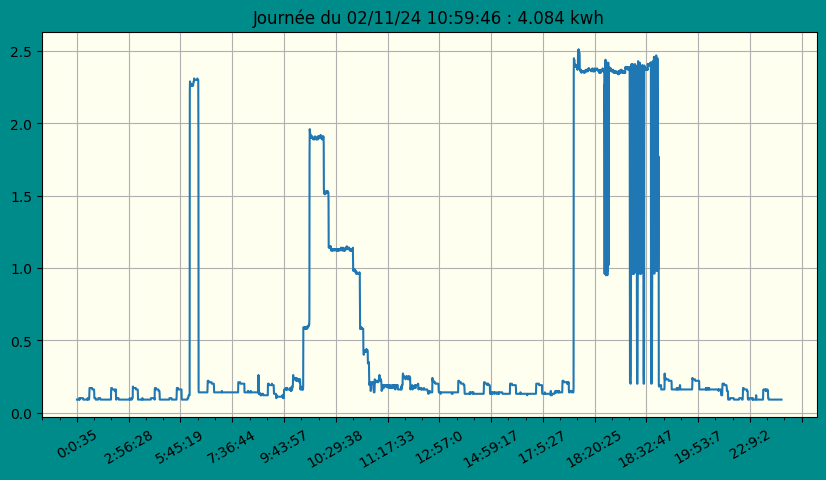

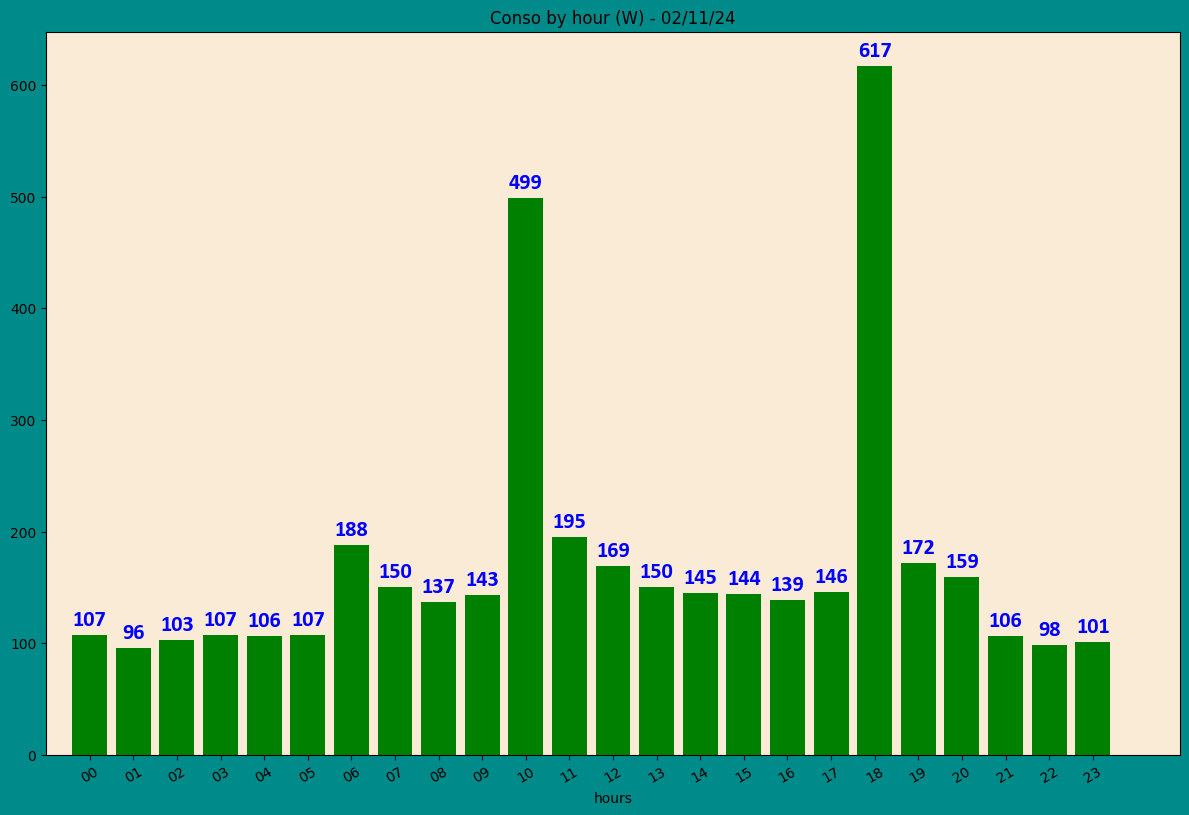

In [222]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [223]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,107,107,NaN,NaN
01,96,203,-11.0,NaN
02,103,306,7.0,NaN
03,107,413,4.0,NaN
04,106,519,-1.0,NaN
05,107,626,1.0,NaN
06,188,814,81.0,NaN
07,150,964,-38.0,NaN
08,137,1101,-13.0,NaN


In [224]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

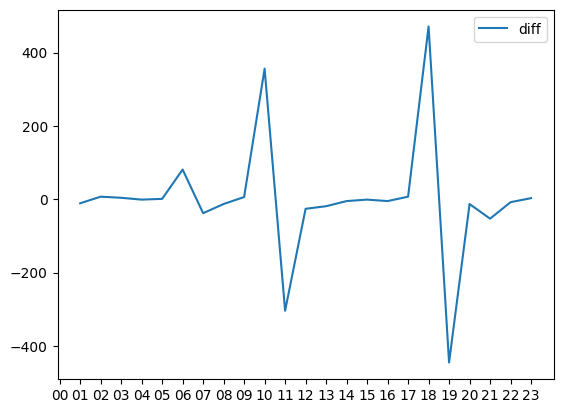

In [225]:
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

In [226]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)